# connect to database

In [1]:
import pandas
import configparser
import psycopg2

In [2]:
config = configparser.ConfigParser()
config.read('config.ini')

host = config['myaws']['host']
db = config['myaws']['db']
user = config['myaws']['user']
pwd = config['myaws']['pwd']

In [3]:
conn = psycopg2.connect(
                        host = host,
                        user = user,
                        password = pwd,
                        dbname = db)

# q1

In [5]:
sql = "select * from student "

In [6]:
df = pandas.read_sql_query(sql,conn)
df[:]

/tmp/ipykernel_19714/831397919.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pandas.read_sql_query(sql,conn)


,s_email,s_name,major
0,s2@jmu.edu,s2,IA
1,s3@jmu.edu,s3,ISAT
2,s4@jmu.edu,s4,ISAT
3,s1@jmu.edu,s1,IA
4,s5@jmu.edu,s5,IA


# q2

In [7]:
sql = """select professor.p_name, course.c_name
            from professor
            inner join course
            on professor.p_email = course.p_email
"""

In [8]:
df = pandas.read_sql_query(sql,conn)
df[:]

/tmp/ipykernel_19714/831397919.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pandas.read_sql_query(sql,conn)


,p_name,c_name
0,p2,mongodb
1,p3,facebook
2,p3,postgresql
3,p3,twitter


# q3

In [10]:
sql = """select c_number, count(*) as num_student
            from enroll
            group by c_number
"""

/tmp/ipykernel_19714/810718974.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pandas.read_sql_query(sql,conn)


<Axes: xlabel='c_number'>

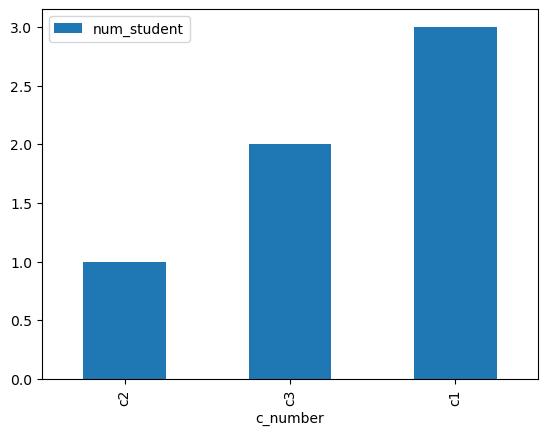

In [11]:
df = pandas.read_sql_query(sql,conn)
df.plot.bar(y='num_student', x='c_number')

# q4

In [12]:
sql = """select p_name, count(*) as c_number
            from professor
            inner join course
            on professor.p_email = course.p_email
            group by p_name
"""

/tmp/ipykernel_19714/848265064.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pandas.read_sql_query(sql,conn)


<Axes: xlabel='p_name'>

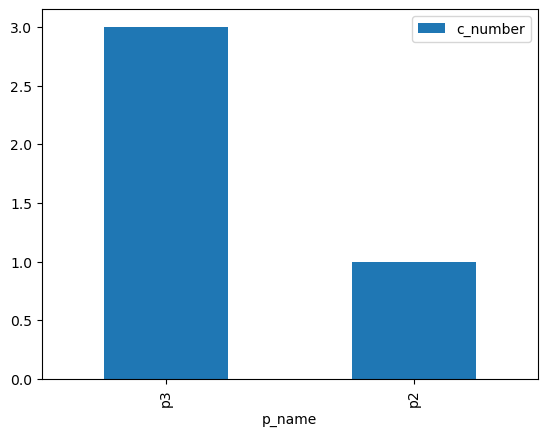

In [13]:
df = pandas.read_sql_query(sql,conn)
df.plot.bar(y='c_number', x='p_name')

# q5

In [21]:
cur = conn.cursor()

In [22]:
sql = """ insert into professor (p_email, p_name, office)
            values('{}','{}','{}' )
            """.format('p4@jmu.edu','p4','o4')

In [23]:
cur.execute(sql)

In [24]:
conn.commit()

In [25]:
sql = """select * from professor"""

In [26]:
df = pandas.read_sql_query(sql,conn)
df[:]

/tmp/ipykernel_19714/831397919.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pandas.read_sql_query(sql,conn)


,p_email,p_name,office
0,p2@jmu.edu,p2,o2
1,p3@jmu.edu,p3,o3
2,p4@jmu.edu,p4,o4


In [34]:
cur = conn.cursor()

In [35]:
sql = """ insert into course (c_number, c_name, room, p_email)
            values ('{}','{}','{}','{}')
            """.format('c5', 'linkedin', 'r2','p4@jmu.edu')

In [36]:
cur.execute(sql)

In [37]:
conn.commit()

In [38]:
sql = """select * from course"""

In [39]:
df = pandas.read_sql_query(sql,conn)
df[:]

/tmp/ipykernel_19714/831397919.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pandas.read_sql_query(sql,conn)


,c_number,c_name,room,p_email
0,c2,mongodb,r2,p2@jmu.edu
1,c4,facebook,r1,p3@jmu.edu
2,c1,postgresql,r1,p3@jmu.edu
3,c3,twitter,r1,p3@jmu.edu
4,c5,linkedin,r2,p4@jmu.edu


# q6

In [64]:
cur = conn.cursor()

In [63]:
sql = """update course
            set p_email = 'p4@jmu.edu'
            where p_email= 'p2@jmu.edu';
"""

In [65]:
cur.execute(sql)

In [66]:
conn.commit()

In [62]:
conn.rollback()

In [67]:
sql = """select * from course"""

In [68]:
df = pandas.read_sql_query(sql,conn)
df[:]

/tmp/ipykernel_19714/831397919.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pandas.read_sql_query(sql,conn)


,c_number,c_name,room,p_email
0,c4,facebook,r1,p3@jmu.edu
1,c1,postgresql,r1,p3@jmu.edu
2,c3,twitter,r1,p3@jmu.edu
3,c5,linkedin,r2,p4@jmu.edu
4,c2,mongodb,r2,p4@jmu.edu


In [69]:
cur = conn.cursor()

In [70]:
sql = """delete from professor
            where p_email = 'p2@jmu.edu'
"""

In [71]:
cur.execute(sql)

In [72]:
conn.commit()

In [73]:
sql = """select * from professor"""

In [74]:
df = pandas.read_sql_query(sql,conn)
df[:]

/tmp/ipykernel_19714/831397919.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pandas.read_sql_query(sql,conn)


,p_email,p_name,office
0,p3@jmu.edu,p3,o3
1,p4@jmu.edu,p4,o4
